 # Analysis of Transportation Network Companies (TNCs) and Taxis in Chicago
 ## Creating demographic maps
 This notebook creates demographic maps to complement the analysis of Taxi and TNC data for Chicago. The starting datasets for this notebook were generated by selecting one week of trips for each dataset: for the TNCs the selected week is November 5 - November 11, 2019; for the taxi trips, the selected week is November 7 - November 13, 2016.

 A project by:<br><br>
 Juan Francisco Saldarriaga<br>
 Senior Data and Design Researcher<br>
 Brown Institute for Media Innovation<br>
 School of Journalism, Columbia University<br>
 jfs2118@columbia.edu<br>
 <br>
 and<br><br>
 David King<br>
 School of Geographical Sciences and Urban Planning<br>
 Faculty Advisor, Barrett Honors College<br>
 Arizona State University<br>
 david.a.king@asu.edu<br>

 The original data for this project can be found at:
 * Taxi trips: [Chicago Data Portal](https://data.cityofchicago.org/Transportation/Taxi-Trips/wrvz-psew), accessed on June 12, 2019.
 * TNC trips: [Chicago Data Portal](https://data.cityofchicago.org/Transportation/Transportation-Network-Providers-Trips/m6dm-c72p), accessed on April 26, 2019.
 * Chicago census tracts: [US Census Bureau](https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2018&layergroup=Census+Tracts), accessed on June 12, 2019.
 * Chicago boundaries: [Chicago Data Portal](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-City/ewy2-6yfk), accessed on June 13, 2019.
 * Cook county race and ethnicity (table B03002) American Community Survey 5-year estimates for 2017: [American FactFinder](https://factfinder.census.gov/faces/nav/jsf/pages/searchresults.xhtml?refresh=t), accessed on July 1, 2019.

**Importing libraries (Pandas, Numpy, Geopandas, Shapely, Pysal, and Matplotlib)**

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pysal as ps
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from shapely.geometry import Point
%matplotlib inline

/usr/local/lib/python3.7/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


**Setting up global paths and file names**

In [2]:
inputDataPath = '../input/'
outputDataPath = '../output/'
illinoisCensusTractsFileName = 'tl_2018_17_tract.shp'
chicagoBoundaries = 'chicago.shp'

**Loading Illinois census tracts and Chicago shapefiles and selecting Chicago census tracts**

In [3]:
illinoisCT = gpd.read_file(inputDataPath + illinoisCensusTractsFileName)

In [4]:
illinoisCT.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,17,091,011700,17091011700,117,Census Tract 117,G5020,S,2370100,102060,+41.1294653,-087.8735796,"POLYGON ((-87.887682 41.13594, -87.887643 41.1..."
1,17,091,011800,17091011800,118,Census Tract 118,G5020,S,1790218,55670,+41.1403452,-087.8760059,"POLYGON ((-87.89409599999999 41.143875, -87.89..."
2,17,119,400951,17119400951,4009.51,Census Tract 4009.51,G5020,S,5170038,169066,+38.7277628,-090.1002620,POLYGON ((-90.11191599999999 38.70280899999999...
3,17,119,400952,17119400952,4009.52,Census Tract 4009.52,G5020,S,5751222,305905,+38.7301928,-090.0827510,"POLYGON ((-90.09442 38.720308, -90.093604 38.7..."
4,17,189,950300,17189950300,9503,Census Tract 9503,G5020,S,30383680,349187,+38.3567671,-089.3783135,"POLYGON ((-89.413484 38.307848, -89.413478 38...."


In [5]:
chicago = gpd.read_file(inputDataPath + chicagoBoundaries)

In [6]:
chicago.head()

,name,objectid,shape_area,shape_len,geometry
0,CHICAGO,1.0,6.450277e+09,845282.931362,(POLYGON ((-87.93514385942143 42.0008891160732...


Setting the base projection (epsg 3435)

In [7]:
illinoisCT.crs

{'init': 'epsg:4269'}

In [8]:
chicago.crs

{'init': 'epsg:4326'}

In [9]:
chicagoCRS = {'init': 'epsg:3435'}
illinoisCT = illinoisCT.to_crs(chicagoCRS)
chicago = chicago.to_crs(chicagoCRS)

Select Chicago's census tracts

In [10]:
chicagoCT = gpd.overlay(illinoisCT, chicago, how='intersection')

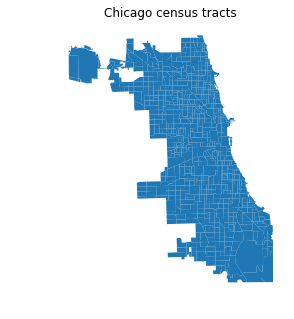

In [11]:
plt.rcParams["figure.figsize"] = [5,5]
chicagoCT.plot()
plt.title('Chicago census tracts')
plt.axis('off')
plt.show()

In [12]:
chicagoCT.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,name,objectid,shape_area,shape_len,geometry
0,17,031,630200,17031630200,6302,Census Tract 6302,G5020,S,634189,0,+41.8027454,-087.6940453,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1155871.125512983 1871909.081561193,..."
1,17,031,430400,17031430400,4304,Census Tract 4304,G5020,S,548003,0,+41.7621978,-087.5903116,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1185573.163559425 1855658.698187056,..."
2,17,031,430600,17031430600,4306,Census Tract 4306,G5020,S,333359,0,+41.7644133,-087.5713730,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1190772.918094938 1858308.025206784,..."
3,17,031,430800,17031430800,4308,Census Tract 4308,G5020,S,328071,0,+41.7607500,-087.5712983,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1190806.879681984 1856960.331968893,..."
4,17,031,430500,17031430500,4305,Census Tract 4305,G5020,S,342833,0,+41.7643139,-087.5812700,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1188037.765731956 1858250.220428871,..."


In [13]:
chicagoCT.shape

(857, 17)

**Joining demographic data to Chicago census tracts**

In [14]:
demographics = pd.read_csv(inputDataPath + 'ACS_17_5YR_B03002.csv', delimiter=',')

In [15]:
demographics.head()

,GEO.id,GEO.id2,GEO.display-label,HD01_VD01,HD02_VD01,HD01_VD02,HD02_VD02,HD01_VD03,HD02_VD03,HD01_VD04,...,HD01_VD17,HD02_VD17,HD01_VD18,HD02_VD18,HD01_VD19,HD02_VD19,HD01_VD20,HD02_VD20,HD01_VD21,HD02_VD21
0,1400000US17031010100,17031010100,"Census Tract 101, Cook County, Illinois",4444,444,4034,497,1726,304,2059,...,0,11,127,126,0,11,0,11,0,11
1,1400000US17031010201,17031010201,"Census Tract 102.01, Cook County, Illinois",7197,787,5570,699,2217,489,2775,...,0,15,112,117,57,69,23,38,34,55
2,1400000US17031010202,17031010202,"Census Tract 102.02, Cook County, Illinois",2487,301,1770,282,818,183,726,...,0,11,277,190,0,11,0,11,0,11
3,1400000US17031010300,17031010300,"Census Tract 103, Cook County, Illinois",6413,540,5209,588,2930,376,1774,...,0,15,179,186,32,36,32,36,0,15
4,1400000US17031010400,17031010400,"Census Tract 104, Cook County, Illinois",5411,566,5021,552,3476,488,1125,...,0,15,40,40,12,19,12,19,0,15


In [16]:
demographics.shape

(1319, 45)

In [17]:
demographics.rename(index=str, columns={'GEO.id2': 'GEOID', 'HD01_VD01': 'TotPop', 'HD01_VD03': 'White', 'HD01_VD04': 'Black', 'HD01_VD06': 'Asian', 'HD01_VD12': 'Hispanic'}, inplace=True)

In [18]:
demographics = demographics[['GEOID', 'TotPop', 'White', 'Black', 'Asian', 'Hispanic']]

In [19]:
demographics.head()

,GEOID,TotPop,White,Black,Asian,Hispanic
0,17031010100,4444,1726,2059,33,410
1,17031010201,7197,2217,2775,121,1627
2,17031010202,2487,818,726,185,717
3,17031010300,6413,2930,1774,359,1204
4,17031010400,5411,3476,1125,295,390


In [20]:
demographics['GEOID'] = demographics['GEOID'].astype('str')

In [21]:
chicagoDemographics = pd.merge(chicagoCT, demographics, left_on='GEOID', right_on='GEOID', how='left')

In [22]:
chicagoDemographics.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,name,objectid,shape_area,shape_len,geometry,TotPop,White,Black,Asian,Hispanic
0,17,031,630200,17031630200,6302,Census Tract 6302,G5020,S,634189,0,...,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1155871.125512983 1871909.081561193,...",2089.0,131.0,17.0,57.0,1884.0
1,17,031,430400,17031430400,4304,Census Tract 4304,G5020,S,548003,0,...,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1185573.163559425 1855658.698187056,...",2934.0,64.0,2828.0,0.0,0.0
2,17,031,430600,17031430600,4306,Census Tract 4306,G5020,S,333359,0,...,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1190772.918094938 1858308.025206784,...",1732.0,92.0,1579.0,2.0,17.0
3,17,031,430800,17031430800,4308,Census Tract 4308,G5020,S,328071,0,...,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1190806.879681984 1856960.331968893,...",1549.0,66.0,1448.0,0.0,16.0
4,17,031,430500,17031430500,4305,Census Tract 4305,G5020,S,342833,0,...,CHICAGO,1.0,6.450277e+09,845282.931362,"POLYGON ((1188037.765731956 1858250.220428871,...",3543.0,68.0,3365.0,0.0,85.0


In [23]:
chicagoDemographics.shape

(857, 22)

In [24]:
chicagoDemographics['TotPop'].fillna(inplace=True, value=0)
chicagoDemographics['White'].fillna(inplace=True, value=0)
chicagoDemographics['Black'].fillna(inplace=True, value=0)
chicagoDemographics['Asian'].fillna(inplace=True, value=0)
chicagoDemographics['Hispanic'].fillna(inplace=True, value=0)

In [25]:
chicagoDemographics['PerWhite'] = chicagoDemographics['White'] / chicagoDemographics['TotPop']
chicagoDemographics['PerBlack'] = chicagoDemographics['Black'] / chicagoDemographics['TotPop']
chicagoDemographics['PerAsian'] = chicagoDemographics['Asian'] / chicagoDemographics['TotPop']
chicagoDemographics['PerHispanic'] = chicagoDemographics['Hispanic'] / chicagoDemographics['TotPop']

In [26]:
chicagoDemographics['PerWhite'].fillna(inplace=True, value=0)
chicagoDemographics['PerBlack'].fillna(inplace=True, value=0)
chicagoDemographics['PerAsian'].fillna(inplace=True, value=0)
chicagoDemographics['PerHispanic'].fillna(inplace=True, value=0)

**Creating demographic maps**

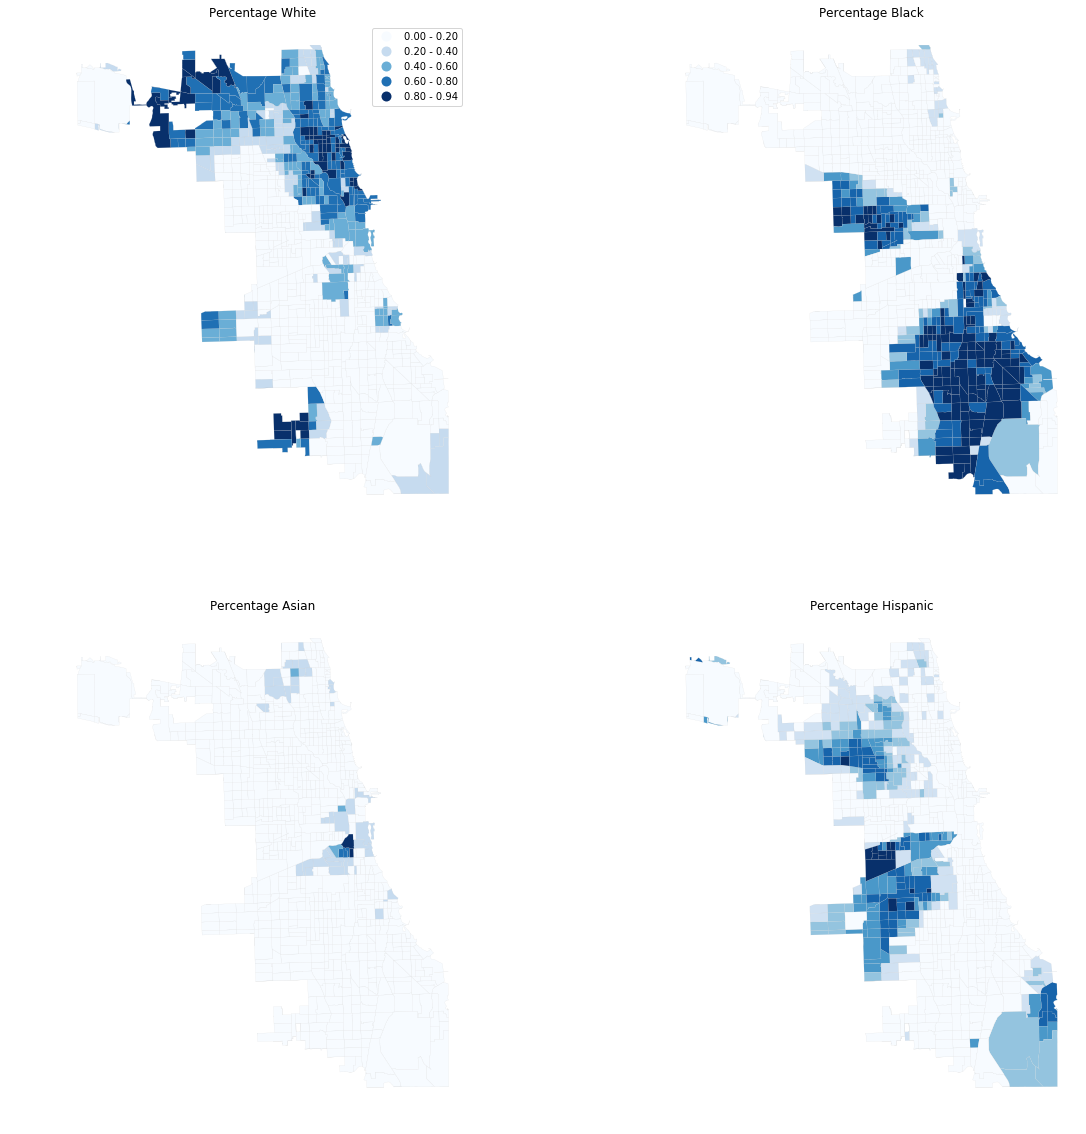

In [27]:
bins = {'bins':[0.2, 0.4, 0.6, 0.8], 'k':5}
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
ax1 = chicagoDemographics.plot(ax=ax1, column='PerWhite', legend=True, cmap='Blues', linewidth=0.1, edgecolor='0.8', scheme='user_defined', classification_kwds=bins)
ax2 = chicagoDemographics.plot(ax=ax2, column='PerBlack', legend=False, cmap='Blues', linewidth=0.1, edgecolor='0.8', scheme='user_defined', classification_kwds=bins)
ax3 = chicagoDemographics.plot(ax=ax3, column='PerAsian', legend=False, cmap='Blues', linewidth=0.1, edgecolor='0.8', scheme='user_defined', classification_kwds=bins)
ax4 = chicagoDemographics.plot(ax=ax4, column='PerHispanic', legend=False, cmap='Blues', linewidth=0.1, edgecolor='0.8', scheme='user_defined', classification_kwds=bins)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax1.title.set_text('Percentage White')
ax2.title.set_text('Percentage Black')
ax3.title.set_text('Percentage Asian')
ax4.title.set_text('Percentage Hispanic')